In [36]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib

pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)

import warnings
warnings.filterwarnings('ignore')

import re
import geocoder
from geopy.distance import great_circle, vincenty
from tqdm import tqdm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import os
import gc
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from time import time
import datetime
from script import RegressionPredictor,LogRegressionPredictor,plot_scatter
import japanize_matplotlib
# print(os.listdir("././input"))
# print(os.listdir("././submit"))
from utils import save_data
SEED=1234
n_splits=10
import glob

In [22]:
train=pd.read_csv('./input/prep_train1106.csv')
test=pd.read_csv('./input/prep_test1106.csv')
y_train = train['賃料']
drop_col = ['id']

## 必要な特徴量に絞る
y_train = train['賃料']
y_train_log = np.log1p(y_train)
X_train = train.drop(drop_col,axis=1)
X_test = test.drop(drop_col,axis=1)

In [27]:
oof1=pd.read_csv('./stacking/oof_14491_log_tika_PerArea.csv',header=None)
oof2=pd.read_csv('./stacking/oof_14853_log_tika_TE.csv',header=None)
oof3=pd.read_csv('./stacking/oof_14487_log_tika_PerArea_TE_es100.csv',header=None)

RMSE :  14228.364515711253
R^2 :  0.9598879579080856


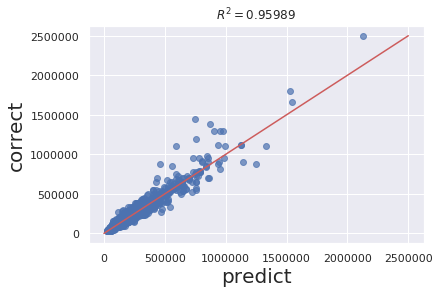

In [28]:
plot_scatter((oof1[1]+oof2[1]+oof3[1])/3,y_train)

In [31]:
oof4=oof3.copy()
oof4[1]=(oof1[1]+oof2[1]+oof3[1])/3

In [32]:
rmse=np.sqrt(mean_squared_error(oof4[1],y_train))

In [33]:
rmse

14228.364515711253

In [34]:
pred1=pd.read_csv('./stacking/submit_14491_log_tika_PerArea.csv',header=None)
pred2=pd.read_csv('./stacking/submit_14853_log_tika_TE.csv',header=None)
pred3=pd.read_csv('./stacking/submit_14487_log_tika_PerArea_TE_es100.csv',header=None)
pred4=pred2.copy()
pred4[1]=(pred1[1]+pred2[1]+pred3[1])/3
# pred3.to_csv('./submit/1106_mean.csv',header=None,index=None)
save_data(X_train,oof4[1].values, pred4[1].values,rmse=rmse,name='1106_mean4',save_dir='./stacking')

RMSE :  14491.990125854389
R^2 :  0.958776638801473


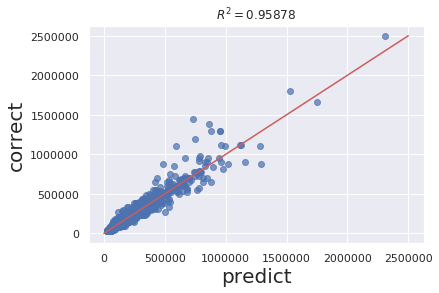

In [7]:
plot_scatter(oof1[1],y_train)

RMSE :  14853.139582397185
R^2 :  0.9557939913198069


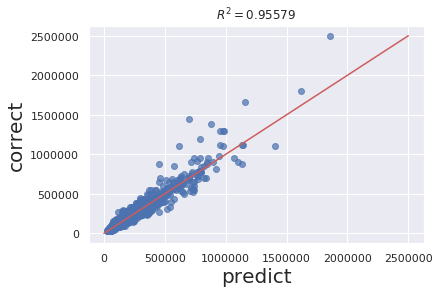

In [10]:
plot_scatter(oof2[1],y_train)

In [43]:
pred1=pd.read_csv('./submit/1105_mean.csv',header=None)
pred2=pd.read_csv('./stacking/submit_14228.364515711253_1106_mean4.csv',header=None)
pred3[1]=(pred1[1]+pred2[1])/2
# pred3.to_csv('./submit/1106_mean.csv',header=None,index=None)
save_data(X_train,oof4[1].values, pred3[1].values,rmse=rmse,name='1106_last_mean2',save_dir='./stacking')

,id,target
0,31471,130465.949969
1,31472,119220.679165
2,31473,76152.790593
3,31474,61276.676126
4,31475,93610.302247


,id,target
0,1,78784.582220
1,2,66376.676877
2,3,109939.727180
3,4,171518.981808
4,5,68525.969314


In [41]:
pred1

,0,1
0,31471,131880.329554
1,31472,119154.885720
2,31473,75961.545705
3,31474,60305.867393
4,31475,93601.379582
...,...,...
31257,62728,101279.571706
31258,62729,102470.395733
31259,62730,174051.899442
31260,62731,279571.756212


In [40]:
pred2

,0,1
0,31471,129051.570384
1,31472,119286.472609
2,31473,76344.035482
3,31474,62247.484860
4,31475,93619.224911
...,...,...
31257,62728,101032.577161
31258,62729,103563.455583
31259,62730,174082.623026
31260,62731,280071.869598


In [39]:
pred3

,0,1
0,31471,130465.949969
1,31472,119220.679165
2,31473,76152.790593
3,31474,61276.676126
4,31475,93610.302247
...,...,...
31257,62728,101156.074434
31258,62729,103016.925658
31259,62730,174067.261234
31260,62731,279821.812905
